In [1]:
import numpy as np
import networkx as nx

In [67]:
class SBM:
    def __init__(self, 
                 gamma:int,
                 alpha:float,
                 beta:float,
                 P:np.array,
                 N:int):
        
        self.gamma = gamma
        self.alpha = alpha
        self.beta = beta

        self.N = N
        self.P = P/np.sum(P)

        self.A = np.zeros((self.N,self.N))

        self.graph_building()

    def block_assignment(self):
        self.B = {node: np.random.choice(self.gamma, replace = True, p=self.P) 
                  for node in range(self.N)}
    
    def block_transition(self):
        self.C = np.ones((self.gamma, self.gamma))*self.beta   
        self.C[range(self.gamma),range(self.gamma)] = self.alpha

    def edge_generation(self):

        for i in range(self.N):
            for j in range(i + 1, self.N):
                U = self.B[i]
                V = self.B[j]

                p = np.array([1 - self.C[U,V], self.C[U,V]])
                edge = np.random.choice(2, p = p)

                self.A[i,j] = edge
                self.A[j,i] = edge
    
    def graph_building(self):
        
        self.block_assignment()
        self.block_transition()
        self.edge_generation()

In [72]:
G = SBM(3, 0.95, 0.1, np.array([0.45,0.30,0.25]), 20)

In [73]:
nxG = nx.from_numpy_matrix(G.A)

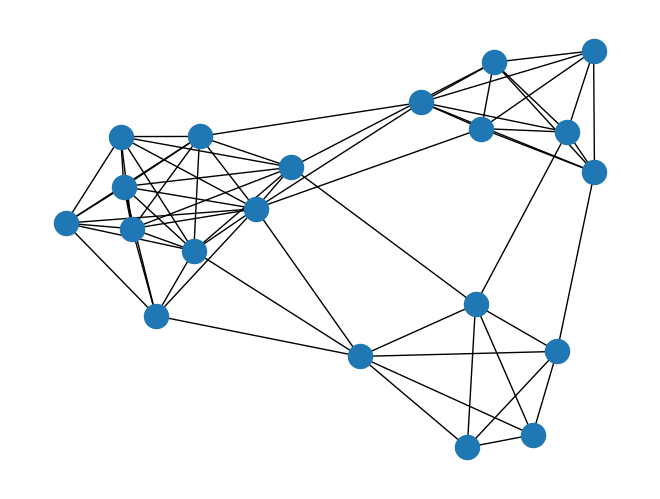

In [74]:
nx.draw_spring(nxG)